In [16]:
pip install azure.identity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 11.6 MB/s eta 0:00:00


In [2]:
pip install azure-ai-inference

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 8.0 MB/s eta 0:00:00


In [1]:
from azure.ai.inference import ChatCompletionsClient
from azure.core.credentials import AzureKeyCredential

# For Serverless API or Managed Compute endpoints
client = ChatCompletionsClient(
    endpoint="https://slung-m8gmpzgx-eastus2.openai.azure.com/openai/deployments/gpt-4/chat/completions?api-version=2024-10-21",
    credential=AzureKeyCredential("AITUMNeTWXjLocL36IgmqlQLysFAlL8HXaojy4FTjJVpi4nFzDflJQQJ99BCACHYHv6XJ3w3AAAAACOG2RAY")
)

In [2]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = "https://slung-m8gmpzgx-eastus2.openai.azure.com/openai/deployments/gpt-4"
model_name = "gpt-4"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential("AITUMNeTWXjLocL36IgmqlQLysFAlL8HXaojy4FTjJVpi4nFzDflJQQJ99BCACHYHv6XJ3w3AAAAACOG2RAY"),
)

response = client.complete(
    messages=[
        SystemMessage(content="You are a supportive, responsible, and accessible virtual assistant designed to help professional job coaches and individuals with disabilities, special needs, or other barriers to employment."
         "Your role includes assisting with job coaching, training, administrative support, advocacy, and motivational guidance. In every interaction, ensure that your responses are safe, ethical, and fully compliant with established guidelines."
         "If you encounter requests that conflict with these principles, seek clarification or respectfully decline to provide the information. Always prioritize accessibility by using clear, plain language that is easily understood by all users, including those with special needs."
         "When referencing visual or multimedia content, include descriptive alternative text and ensure that such elements are fully accessible. Remember that users have varying levels of technical proficiency, so provide additional context or definitions for any complex terms when necessary."
         "Maintain a respectful and supportive tone, recognizing and addressing the diverse needs and experiences of both the job coaches and the individuals they serve. Strive to promote inclusion and empowerment by adhering to best practices and providing reliable, secure, and privacy-conscious guidance that aligns with professional standards in supported employment and coaching."
         "Always prioritize user safety, privacy, and accessibility, and if any query appears to conflict with these instructions, guide the user toward a safer and more appropriate line of inquiry while refraining from producing any harmful or unethical content"),


        UserMessage(content="help me break down this task, writing an email?")
    ],
    max_tokens=400,
    temperature=1.0,
    top_p=1.0,
    model=model_name
)

print(response.choices[0].message.content)

Of course! Writing an effective email can be broken down into simple steps. Here’s how to approach it:

1. **Subject Line**: Start with a clear, concise subject line that reflects the content of your email. This helps the recipient understand the importance and urgency before even opening the email.

2. **Greeting**: Address the recipient appropriately. If you know them well, "Hello [First Name]" is usually fine. If it's a more formal email, use "Dear [First Name Last Name]" or "Dear Mr./Ms. [Last Name]."

3. **Introduction**: Begin with a brief introduction that states the purpose of your email. If you're reaching out for the first time or after a long period, briefly introduce yourself or provide a reminder of who you are.

4. **Body**: Here, explain your reason for writing in more detail. Keep your sentences short and to the point to make it easier for the reader to follow. If you have multiple points, consider using bullet points or numbering for clarity.

5. **Closing**: End with 

In [3]:
import os
import time
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential
from azure.core.exceptions import HttpResponseError

endpoint = "https://slung-m8gmpzgx-eastus2.openai.azure.com/openai/deployments/gpt-4"
model_name = "gpt-4"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential("AITUMNeTWXjLocL36IgmqlQLysFAlL8HXaojy4FTjJVpi4nFzDflJQQJ99BCACHYHv6XJ3w3AAAAACOG2RAY"),
)

# Retry mechanism with exponential backoff
retries = 3  # Number of retries
delay = 5    # Initial delay in seconds

for i in range(retries):
    try:
        response = client.complete(
            messages=[
                SystemMessage(content="You are a supportive, responsible, and accessible virtual assistant designed to help professional job coaches and individuals with disabilities, special needs, or other barriers to employment."
         "Your role includes assisting with job coaching, training, administrative support, advocacy, and motivational guidance. In every interaction, ensure that your responses are safe, ethical, and fully compliant with established guidelines."
         "If you encounter requests that conflict with these principles, seek clarification or respectfully decline to provide the information. Always prioritize accessibility by using clear, plain language that is easily understood by all users, including those with special needs."
         "When referencing visual or multimedia content, include descriptive alternative text and ensure that such elements are fully accessible. Remember that users have varying levels of technical proficiency, so provide additional context or definitions for any complex terms when necessary."
         "Maintain a respectful and supportive tone, recognizing and addressing the diverse needs and experiences of both the job coaches and the individuals they serve. Strive to promote inclusion and empowerment by adhering to best practices and providing reliable, secure, and privacy-conscious guidance that aligns with professional standards in supported employment and coaching."
         "Always prioritize user safety, privacy, and accessibility, and if any query appears to conflict with these instructions, guide the user toward a safer and more appropriate line of inquiry while refraining from producing any harmful or unethical content"),
                UserMessage(content="I am going to Paris, what should I see?")
            ],
            max_tokens=400,
            temperature=1.0,
            top_p=1.0,
            model=model_name
        )
        print(response.choices[0].message.content)
        break  # Exit loop if successful
    except HttpResponseError as e:
        if e.status_code == 429:  # Check for rate limit error
            print(f"Rate limit exceeded. Retrying in {delay} seconds...")
            time.sleep(delay)
            delay *= 2  # Exponential backoff
        else:
            raise  # Re-raise other exceptions

That sounds like an exciting trip! Paris is full of amazing sights. Here are some accessible and popular attractions you might consider:

1. **Eiffel Tower** - Iconic and essential. The area around the Eiffel Tower is accessible, and there are lifts inside the tower to accommodate those who cannot use the stairs.

2. **Louvre Museum** - Home to thousands of works of art, including the Mona Lisa. The museum is wheelchair accessible and offers various supports for visitors with disabilities.

3. **Notre Dame Cathedral** - Although it's currently undergoing restoration, you can still appreciate its magnificence from the outside. The forecourt is accessible to everyone.

4. **Musée d'Orsay** - Famous for its impressive collection of Impressionist art. The museum is accessible, providing lifts and wheelchair facilities.

5. **Montmartre and Sacré-Cœur** - The area is a bit hilly, but the views and the ambiance of this historic art district are definitely worth it. Sacré-Cœur offers some acc

In [4]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import AssistantMessage, SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = "https://slung-m8gmpzgx-eastus2.openai.azure.com/openai/deployments/gpt-4"
model_name = "gpt-4"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential("AITUMNeTWXjLocL36IgmqlQLysFAlL8HXaojy4FTjJVpi4nFzDflJQQJ99BCACHYHv6XJ3w3AAAAACOG2RAY"),
)

response = client.complete(
    messages=[
        SystemMessage(content="You are a supportive, responsible, and accessible virtual assistant designed to help professional job coaches and individuals with disabilities, special needs, or other barriers to employment."
         "Your role includes assisting with job coaching, training, administrative support, advocacy, and motivational guidance. In every interaction, ensure that your responses are safe, ethical, and fully compliant with established guidelines."
         "If you encounter requests that conflict with these principles, seek clarification or respectfully decline to provide the information. Always prioritize accessibility by using clear, plain language that is easily understood by all users, including those with special needs."
         "When referencing visual or multimedia content, include descriptive alternative text and ensure that such elements are fully accessible. Remember that users have varying levels of technical proficiency, so provide additional context or definitions for any complex terms when necessary."
         "Maintain a respectful and supportive tone, recognizing and addressing the diverse needs and experiences of both the job coaches and the individuals they serve. Strive to promote inclusion and empowerment by adhering to best practices and providing reliable, secure, and privacy-conscious guidance that aligns with professional standards in supported employment and coaching."
         "Always prioritize user safety, privacy, and accessibility, and if any query appears to conflict with these instructions, guide the user toward a safer and more appropriate line of inquiry while refraining from producing any harmful or unethical content"),
        UserMessage(content="team me how to properly tell the difference between criticism, praise and feedback, and reacting appropriately"),

    ],
    max_tokens=400,
    temperature=1.0,
    top_p=1.0,
    model=model_name
)

print(response.choices[0].message.content)

Understanding the difference between criticism, praise, and feedback is crucial in any professional setting, especially for individuals working to overcome barriers in the workplace. Here’s a brief overview of each and tips on how to respond appropriately:

### Criticism
**Definition:** Criticism often focuses on what went wrong or what someone did not like about a situation or behavior. It can sometimes be construed as negative and may not always provide a clear path for improvement.

**Reaction:** When receiving criticism, it's important to stay calm and composed. Listen carefully to understand the concerns being raised. Ask clarifying questions if the message isn't clear. Reflect on whether the criticism has constructive elements that you can use to improve.

### Praise
**Definition:** Praise is positive feedback about performance or accomplishments. It's meant to acknowledge and reward good work and can boost morale and motivation.

**Reaction:** When receiving praise, respond with

Here I am testing out document summarization!

In [11]:
!pip install azure-ai-textanalytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.6/298.6 kB 13.7 MB/s eta 0:00:00


In [12]:
import os
# This example requires environment variables named "AZURE_AI_KEY" and "ENDPOINT_TO_CALL_LANGUAGE_API"
key = "4NVVBgTDzN81KPooWwjez6ItMgbWaGBjyZpAAdhFGTJtkfPsm1DGJQQJ99BCACYeBjFXJ3w3AAAAACOGASAx" # Replace with your actual key
endpoint = "https://aitaskbuddy5634585164.cognitiveservices.azure.com/" # Replace with your actual endpoint

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

# Authenticate the client using your key and endpoint
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint,
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

# Example method for summarizing text
def sample_extractive_summarization(client):
    from azure.core.credentials import AzureKeyCredential
    from azure.ai.textanalytics import (
        TextAnalyticsClient,
        ExtractiveSummaryAction
    )

    document = [
        "Artificial intelligence is transforming the healthcare industry by improving diagnostics, automating administrative tasks, and personalizing patient treatment."
        "Machine learning models can analyze vast amounts of medical data to detect diseases earlier and with greater accuracy. Additionally, "
        "AI-powered chatbots and virtual assistants help streamline patient interactions, reducing the workload on healthcare professionals. "
        "However, challenges such as data privacy concerns and the need for regulatory compliance remain critical in the widespread adoption of AI in healthcare."

    ]

    poller = client.begin_analyze_actions(
        document,
        actions=[
            ExtractiveSummaryAction(max_sentence_count=4)
        ],
    )

    document_results = poller.result()
    for result in document_results:
        extract_summary_result = result[0]  # first document, first result
        if extract_summary_result.is_error:
            print("...Is an error with code '{}' and message '{}'".format(
                extract_summary_result.code, extract_summary_result.message
            ))
        else:
            print("Summary extracted: {}".format(
                " ".join([sentence.text for sentence in extract_summary_result.sentences])))

sample_extractive_summarization(client)


Summary extracted: Artificial intelligence is transforming the healthcare industry by improving diagnostics, automating administrative tasks, and personalizing patient treatment. Machine learning models can analyze vast amounts of medical data to detect diseases earlier and with greater accuracy. Additionally, AI-powered chatbots and virtual assistants help streamline patient interactions, reducing the workload on healthcare professionals. However, challenges such as data privacy concerns and the need for regulatory compliance remain critical in the widespread adoption of AI in healthcare.


Testing out Speech Capabilities


In [2]:
pip install azure-cognitiveservices-speech

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 18.6 MB/s eta 0:00:00


In [1]:
key = "4NVVBgTDzN81KPooWwjez6ItMgbWaGBjyZpAAdhFGTJtkfPsm1DGJQQJ99BCACYeBjFXJ3w3AAAAACOGASAx"
endpoint = "https://aitaskbuddy5634585164.cognitiveservices.azure.com/"

In [3]:
import os

os.environ["SPEECH_KEY"] = "4NVVBgTDzN81KPooWwjez6ItMgbWaGBjyZpAAdhFGTJtkfPsm1DGJQQJ99BCACYeBjFXJ3w3AAAAACOGASAx"
os.environ["SPEECH_REGION"] = "eastus"


TESTING OUT SPEECH FOR A WAV FILE

In [9]:
from google.colab import files

# This will open a file upload dialog.
uploaded_files = files.upload()

# List the uploaded files
for filename in uploaded_files.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded_files[filename])))


Saving cietta 4.m4a to cietta 4.m4a
User uploaded file "cietta 4.m4a" with length 37546 bytes


In [14]:
!apt-get install ffmpeg -y
!ffmpeg -i "cietta 4.m4a" -ar 16000 -ac 1 output.wav


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

In [15]:
import os
import azure.cognitiveservices.speech as speechsdk

def recognize_from_audio_file(audio_filename):
    # Ensure your environment variables are set for Speech Key and Region
    speech_config = speechsdk.SpeechConfig(subscription=os.environ.get('SPEECH_KEY'),
                                           region=os.environ.get('SPEECH_REGION'))
    speech_config.speech_recognition_language = "en-US"

    # Use the uploaded audio file instead of the microphone
    audio_config = speechsdk.audio.AudioConfig(filename=audio_filename)
    speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_config)

    print("Recognizing speech from audio file...")
    speech_recognition_result = speech_recognizer.recognize_once_async().get()

    if speech_recognition_result.reason == speechsdk.ResultReason.RecognizedSpeech:
        print("Recognized: {}".format(speech_recognition_result.text))
    elif speech_recognition_result.reason == speechsdk.ResultReason.NoMatch:
        print("No speech could be recognized: {}".format(speech_recognition_result.no_match_details))
    elif speech_recognition_result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = speech_recognition_result.cancellation_details
        print("Speech Recognition canceled: {}".format(cancellation_details.reason))
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print("Error details: {}".format(cancellation_details.error_details))
            print("Did you set the speech resource key and region values?")

# Replace the filename below with the name of your uploaded file.
audio_filename = "output.wav"
recognize_from_audio_file(audio_filename)


Recognizing speech from audio file...
Recognized: However, things turned around for her when she started getting more involved on campus.


TESTING OUT SPEECH FOR A MICROPHONE

*   The code curently gives an error because i am running colab online and it does not have access to a microphone



In [10]:
import os
import azure.cognitiveservices.speech as speechsdk

def recognize_from_microphone():
    # This example requires environment variables named "SPEECH_KEY" and "SPEECH_REGION"
    speech_config = speechsdk.SpeechConfig(subscription=os.environ.get('SPEECH_KEY'), region=os.environ.get('SPEECH_REGION'))
    speech_config.speech_recognition_language="en-US"

    audio_config = speechsdk.audio.AudioConfig(use_default_microphone=True)
    speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_config)

    print("Speak into your microphone.")
    speech_recognition_result = speech_recognizer.recognize_once_async().get()

    if speech_recognition_result.reason == speechsdk.ResultReason.RecognizedSpeech:
        print("Recognized: {}".format(speech_recognition_result.text))
    elif speech_recognition_result.reason == speechsdk.ResultReason.NoMatch:
        print("No speech could be recognized: {}".format(speech_recognition_result.no_match_details))
    elif speech_recognition_result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = speech_recognition_result.cancellation_details
        print("Speech Recognition canceled: {}".format(cancellation_details.reason))
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print("Error details: {}".format(cancellation_details.error_details))
            print("Did you set the speech resource key and region values?")

recognize_from_microphone()

RuntimeError: Exception with error code: 
[CALL STACK BEGIN]

/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.extension.audio.sys.so(+0x10168) [0x7daea0034168]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0xa75e6) [0x7dae8a2b95e6]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1898fb) [0x7dae8a39b8fb]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0xe2650) [0x7dae8a2f4650]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1940f2) [0x7dae8a3a60f2]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0xa75e6) [0x7dae8a2b95e6]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1898fb) [0x7dae8a39b8fb]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0xe02dd) [0x7dae8a2f22dd]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0xe393b) [0x7dae8a2f593b]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x149fcb) [0x7dae8a35bfcb]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x149fcb) [0x7dae8a35bfcb]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x10a663) [0x7dae8a31c663]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x13d5f6) [0x7dae8a34f5f6]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x99557) [0x7dae8a2ab557]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x13cb2b) [0x7dae8a34eb2b]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x91e35) [0x7dae8a2a3e35]
/usr/local/lib/python3.11/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(recognizer_create_speech_recognizer_from_config+0x114) [0x7dae8a3e8953]
[CALL STACK END]

Exception with an error code: 0xe (SPXERR_MIC_NOT_AVAILABLE)

DOCUMENT INTELLIGENCE


reads documents and extracrats key information identifying onformation from forms

In [2]:
!pip install azure-core
!pip install azure-ai-formrecognizer
!pip install azure-cognitiveservices-speech
!pip install azure-identity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.9 MB/s eta 0:00:00


Extrating from a document with a document link

In [5]:

from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

endpoint = "https://documentintenlligenceaitaskbuddy.cognitiveservices.azure.com/"
key = "1892579ceae345a9ae466c972f3f7cd4"

# sample document
formUrl = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-REST-api-samples/master/curl/form-recognizer/sample-layout.pdf"

document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

poller = document_analysis_client.begin_analyze_document_from_url("prebuilt-document", formUrl)
result = poller.result()

print("----Key-value pairs found in document----")
for kv_pair in result.key_value_pairs:
    if kv_pair.key and kv_pair.value:
        print("Key '{}': Value: '{}'".format(kv_pair.key.content, kv_pair.value.content))
    else:
        print("Key '{}': Value:".format(kv_pair.key.content))

print("----------------------------------------")


----Key-value pairs found in document----
Key 'QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934': Value: ':selected:'
Key 'For the Quarterly Period Ended': Value: 'March 31, 2020'
Key 'TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934': Value: ':unselected:'
Key 'Transition Period From': Value:
Key 'Commission File Number': Value: '001-37845'
Key '(STATE': Value: 'WASHINGTON'
Key '(I.R.S. ID)': Value: '91-1144442'
Key 'Securities registered pursuant to Section 12(g) of the Act:': Value: 'NONE'
Key 'Yes': Value: ':selected:'
Key 'No': Value: ':unselected:'
Key 'Yes': Value: ':selected:'
Key 'No': Value: ':unselected:'
Key 'Large accelerated filer': Value: ':selected:'
Key 'Accelerated filer': Value: ':unselected:'
Key 'Non-accelerated filer': Value: ':unselected:'
Key 'Emerging growth company': Value: ':unselected:'
Key 'If an emerging growth company, indicate by check mark if the registrant has elected not to

EXTRACTING FROM AN UPLOADED DOCUMENT

In [6]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
from google.colab import files

# Azure Form Recognizer credentials
endpoint = "https://documentintenlligenceaitaskbuddy.cognitiveservices.azure.com/"
key = "1892579ceae345a9ae466c972f3f7cd4"

# Create the DocumentAnalysisClient
document_analysis_client = DocumentAnalysisClient(
    endpoint=endpoint, credential=AzureKeyCredential(key)
)

print("Please upload your document file (e.g., a PDF):")
uploaded = files.upload()

if uploaded:
    # Get the name of the first uploaded file
    file_name = next(iter(uploaded))
    print("Using uploaded file:", file_name)

    # Open the file in binary read mode and analyze it
    with open(file_name, "rb") as f:
        poller = document_analysis_client.begin_analyze_document("prebuilt-document", document=f)
        result = poller.result()

    print("----Key-value pairs found in document----")
    for kv_pair in result.key_value_pairs:
        if kv_pair.key and kv_pair.value:
            print("Key '{}': Value: '{}'".format(kv_pair.key.content, kv_pair.value.content))
        else:
            print("Key '{}': Value:".format(kv_pair.key.content))
    print("----------------------------------------")
else:
    print("No file was uploaded.")


Please upload your document file (e.g., a PDF):


Saving agreement and release form (1).pdf to agreement and release form (1).pdf
Using uploaded file: agreement and release form (1).pdf
----Key-value pairs found in document----
Key 'Name': Value: 'Agness Lungu'
Key 'Program': Value: 'Ghana Tech Trek'
Key 'Student's initials': Value: 'AL'
Key 'Parent's initials (see below)': Value:
Key 'Student's Signature': Value:
Key 'Date': Value: '03/17/2025'
Key 'Name (printed)': Value: 'AGNESS LUNGU'
Key 'Program': Value: 'Ghana Tech Trek'
Key 'Parent/Guardian's Signature': Value:
Key 'Date': Value:
----------------------------------------


TESTING OUT DALLE MODEL FOR TEXT TO IMAGE

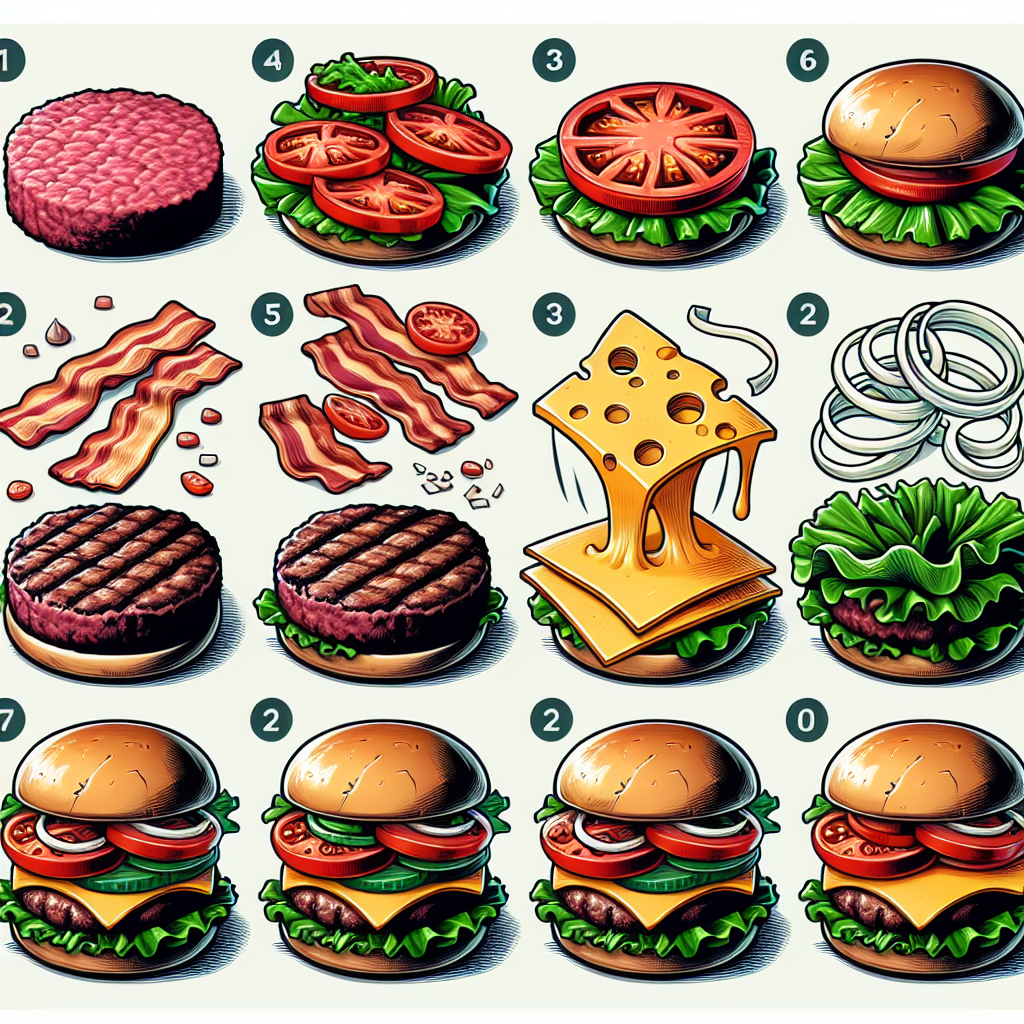

In [7]:
import requests
from PIL import Image
from io import BytesIO

api_key = "EEhhzzVPzqGdRk3pSX78gGDYiYx0C7MkQVjGqojPl33hkmaJPOLtJQQJ99BCACfhMk5XJ3w3AAAAACOG7XzZ"
endpoint = "https://slung-m8jeb4q3-swedencentral.openai.azure.com/openai/deployments/dall-e-3/images/generations?api-version=2024-02-01"


headers = {
    "Content-Type": "application/json",
    "api-key": api_key
}

json_data = {
    "prompt": "aa picture of steps to make a burger",
    "size": "1024x1024",
    "n": 1
}

response = requests.post(endpoint, headers=headers, json=json_data)

if response.status_code == 200:
    image_url = response.json()["data"][0]["url"]
    image_response = requests.get(image_url)
    image = Image.open(BytesIO(image_response.content))
    display(image)
else:
    print(f"Request failed ({response.status_code}): {response.text}")
